# **Source Code Python Homework Final Project - Stage 2**

Kelompok 10/10: 

1. Herline Yastriska
2. Danu Prasetyo
3. Radisha Fanni Sianti
4. Innaufa Qonita Zurraya
5. Mutia Febriana Azzahra
6. Indah Nurcahyani



In [ ]:
# Import package yang dibutuhkan
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as scp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from google.colab import files
import io
import csv

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengupload file
uploaded = files.upload()

In [ ]:
# Membaca dataset yang digunakan yaitu SBAnational.csv
df = pd.read_csv('/content/drive/MyDrive/SBAnational.csv', error_bad_lines=False, warn_bad_lines=True)
# df = pd.read_csv('SBAnational.csv', delimiter = ";")
df.info()

<ipython-input-65-0bc0e1ca0b9b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/SBAnational.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-65-0bc0e1ca0b9b>:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/SBAnational.csv', error_bad_lines=False, warn_bad_lines=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15569 entries, 0 to 15568
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanNr_ChkDgt      15569 non-null  int64  
 1   Name               15565 non-null  object 
 2   City               15569 non-null  object 
 3   State              15568 non-null  object 
 4   Zip                15568 non-null  float64
 5   Bank               15557 non-null  object 
 6   BankState          15557 non-null  object 
 7   NAICS              15568 non-null  float64
 8   ApprovalDate       15568 non-null  object 
 9   ApprovalFY         15568 non-null  float64
 10  Term               15568 non-null  float64
 11  NoEmp              15568 non-null  float64
 12  NewExist           15568 non-null  float64
 13  CreateJob          15568 non-null  float64
 14  RetainedJob        15568 non-null  float64
 15  FranchiseCode      15568 non-null  float64
 16  UrbanRural         155

In [ ]:
# Mengubah tipe data menjadi object
df[['LoanNr_ChkDgt', 'Zip', 'NAICS','NewExist','UrbanRural','FranchiseCode']] = df[['LoanNr_ChkDgt', 'Zip', 'NAICS','NewExist','UrbanRural','FranchiseCode']].astype('object')

# Mengubah tipe data menjadi datetime
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'])

# Mengubah tipe data data menjadi float
df['DisbursementGross'] = df['DisbursementGross'].str.replace('[^\d\.]', '').astype(float)
df['BalanceGross'] = df['BalanceGross'].str.replace('[^\d\.]', '').astype(float)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('[^\d\.]', '').astype(float)
df['GrAppv'] = df['GrAppv'].str.replace('[^\d\.]', '').astype(float)
df['SBA_Appv'] = df['SBA_Appv'].str.replace('[^\d\.]', '').astype(float)

<ipython-input-5-e5d0c11a3713>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace('[^\d\.]', '').astype(float)
<ipython-input-5-e5d0c11a3713>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['BalanceGross'] = df['BalanceGross'].str.replace('[^\d\.]', '').astype(float)
<ipython-input-5-e5d0c11a3713>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('[^\d\.]', '').astype(float)
<ipython-input-5-e5d0c11a3713>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GrAppv'] = df['GrAppv'].str.replace('[^\d\.]', '').astype(float)
<ipython-input-5-e5d0c11a3713>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SBA_Appv'] = df['SB

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15569 entries, 0 to 15568
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LoanNr_ChkDgt      15569 non-null  object        
 1   Name               15565 non-null  object        
 2   City               15569 non-null  object        
 3   State              15568 non-null  object        
 4   Zip                15568 non-null  object        
 5   Bank               15557 non-null  object        
 6   BankState          15557 non-null  object        
 7   NAICS              15568 non-null  object        
 8   ApprovalDate       15568 non-null  datetime64[ns]
 9   ApprovalFY         15568 non-null  float64       
 10  Term               15568 non-null  float64       
 11  NoEmp              15568 non-null  float64       
 12  NewExist           15568 non-null  object        
 13  CreateJob          15568 non-null  float64       
 14  Retain

## **1. Data Cleansing**

### 1.A Handle missing values

In [ ]:
# Identifikasi missing value
df.isna().sum()

LoanNr_ChkDgt            0
Name                     4
City                     0
State                    1
Zip                      1
Bank                    12
BankState               12
NAICS                    1
ApprovalDate             1
ApprovalFY               1
Term                     1
NoEmp                    1
NewExist                 1
CreateJob                1
RetainedJob              1
FranchiseCode            1
UrbanRural               1
RevLineCr                3
LowDoc                   1
ChgOffDate           12388
DisbursementDate        26
DisbursementGross        1
BalanceGross             1
MIS_Status              31
ChgOffPrinGr             1
GrAppv                   1
SBA_Appv                 1
dtype: int64

Seperti yang sudah dibahas sebelumnya pada stage 1 Soal nomor 1.B. bahwa jumlah missing value seluruh variable selain 'ChgOffDate' tidak terlalu signifikan paling besar hanya 0.005%, maka dapat ditangani dengan cara menghapus semua baris yang memiliki missing value. Sedangkan untuk variable 'ChgOffDate' akan dihapus kolomnya karena missing value yang sangat besar > 80%

In [ ]:
# Menghapus baris yang memiliki nilai missing value
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist','RevLineCr', 
                  'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [ ]:
# Menghapus variabel ChgOffDate
df = df.drop(axis =1, columns = ['ChgOffDate'])

In [ ]:
# Cek apakah masih ada missing value
df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

Pada dataset sudah tidak terdapat missing value

In [ ]:
# Cleaning Feature 'ApprovalFY'
df.ApprovalFY.unique()

array([1997., 1980., 2006., 1998., 1999., 2000., 2001., 1972., 2003.,
       2004., 1978., 1979., 1981., 2005.])

In [ ]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int64')
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005])

In [ ]:
# Cleaning Feature 'NewExist
# Feature 'NewExist' seharusnya hanya terdiri dari 2 atau 1 saja, sehingga nilai 0 harus dihilangkan
df.NewExist.unique()

array([2.0, 1.0, 0.0], dtype=object)

In [ ]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]
df.NewExist.unique()

array([2.0, 1.0], dtype=object)

In [ ]:
# Cleaning Feature 'RevLineCr' & 'LowDoc'
print(df.RevLineCr.unique())
print(df.LowDoc.unique())

['N' '0' 'Y' 'T' '`' ',']
['Y' 'N' 'C']


In [ ]:
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]
print(df.RevLineCr.unique())
print(df.LowDoc.unique())

['N' 'Y']
['Y' 'N']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12509 entries, 0 to 15566
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LoanNr_ChkDgt      12509 non-null  object        
 1   Name               12509 non-null  object        
 2   City               12509 non-null  object        
 3   State              12509 non-null  object        
 4   Zip                12509 non-null  object        
 5   Bank               12509 non-null  object        
 6   BankState          12509 non-null  object        
 7   NAICS              12509 non-null  object        
 8   ApprovalDate       12509 non-null  datetime64[ns]
 9   ApprovalFY         12509 non-null  int64         
 10  Term               12509 non-null  float64       
 11  NoEmp              12509 non-null  float64       
 12  NewExist           12509 non-null  object        
 13  CreateJob          12509 non-null  float64       
 14  Retain

### 1.B Handle duplicated data

In [ ]:
# Mengecek apakah ada data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Mengidentifikasi duplikasi pada key variable 'LoanNr_ChkDgt' yang seharusnya unique
df.duplicated(subset=['LoanNr_ChkDgt']).sum()

0

Kesimpulan : Tidak ada duplikat pada dataset tersebut

### 1.C Handle outliers

In [ ]:
# Statistika desktriptif
df.describe()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,12509.000000,12509.000000,12509.000000,12509.000000,12509.000000,1.250900e+04,12509.0,1.250900e+04,1.250900e+04,1.250900e+04
mean,2002.150452,80.807978,8.447758,0.349828,0.526981,9.931985e+04,0.0,8.868652e+03,8.875003e+04,6.069859e+04
std,4.292630,52.476557,92.561057,3.191935,5.250749,1.600794e+05,0.0,3.938844e+04,1.488140e+05,1.164788e+05
min,1972.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+03,0.0,0.000000e+00,2.500000e+03,1.250000e+03
25%,1997.000000,60.000000,2.000000,0.000000,0.000000,2.500000e+04,0.0,0.000000e+00,2.500000e+04,1.250000e+04
50%,2004.000000,84.000000,3.000000,0.000000,0.000000,5.000000e+04,0.0,0.000000e+00,5.000000e+04,2.500000e+04
75%,2005.000000,84.000000,7.000000,0.000000,0.000000,1.000000e+05,0.0,0.000000e+00,9.694000e+04,5.000000e+04
max,2006.000000,358.000000,9992.000000,200.000000,257.000000,3.599911e+06,0.0,1.311939e+06,2.000000e+06,1.500000e+06


In [ ]:
# Mengelompokkan feature
nums1 = ['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob'] 
nums2 = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'] 

<ipython-input-22-05a1411fdcbd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums1[i]], color='gray')
<ipython-input-22-05a1411fdcbd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums1[i]], color='gray')
<ipython-input-22-05a1411fdcbd>:5: UserWarning: 

`distplot` is a deprecated f

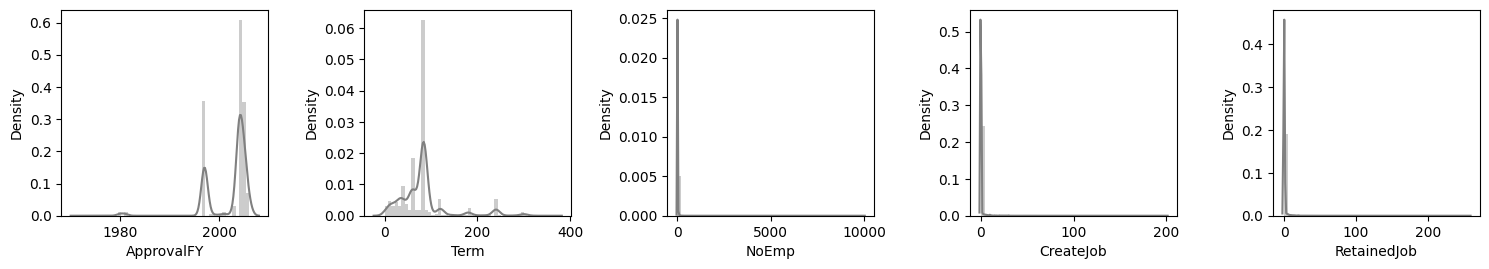

In [ ]:
# Histogram nums1
plt.figure(figsize=(15,5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.distplot(df[nums1[i]], color='gray')
    plt.tight_layout()

<ipython-input-23-4c20b75fa148>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums2[i]], color='gray')
<ipython-input-23-4c20b75fa148>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums2[i]], color='gray')
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarn

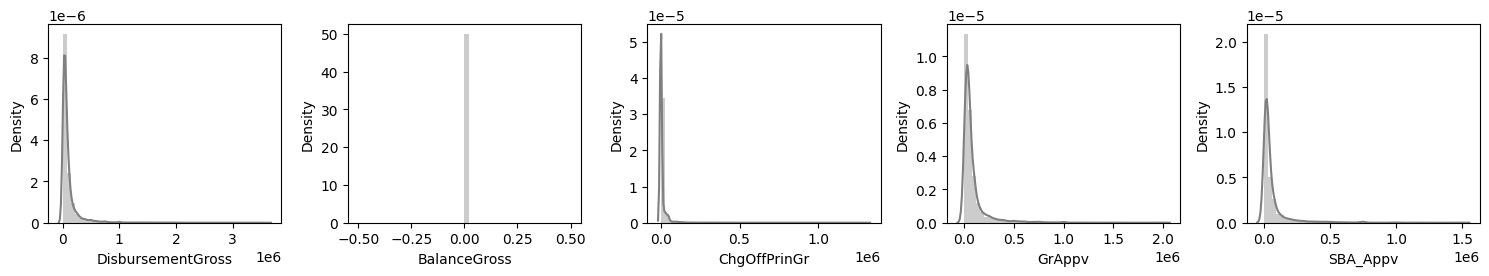

In [ ]:
# Histogram nums2
plt.figure(figsize=(15,5))
for i in range(0, len(nums2)):
    plt.subplot(2, len(nums2), i+1)
    sns.distplot(df[nums2[i]], color='gray')
    plt.tight_layout()

Karena tidak berditribusi normal maka menghapus outliers variabel2 tersebut ('NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv') dengan menggunakan metode 1.5IQR, dimana IQR = Q3-Q1

In [ ]:
# Menghapus outliers variabel 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 
# 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

dfo = df
for col in ['NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv']:
    Q1 = dfo[col].quantile(0.25)
    Q3 = dfo[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    filtered_entries = ((dfo[col] >= low_limit) & (dfo[col] <= high_limit))
    dfo = dfo[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo)}')

Jumlah baris sebelum memfilter outlier: 12509
Jumlah baris setelah memfilter outlier: 8284


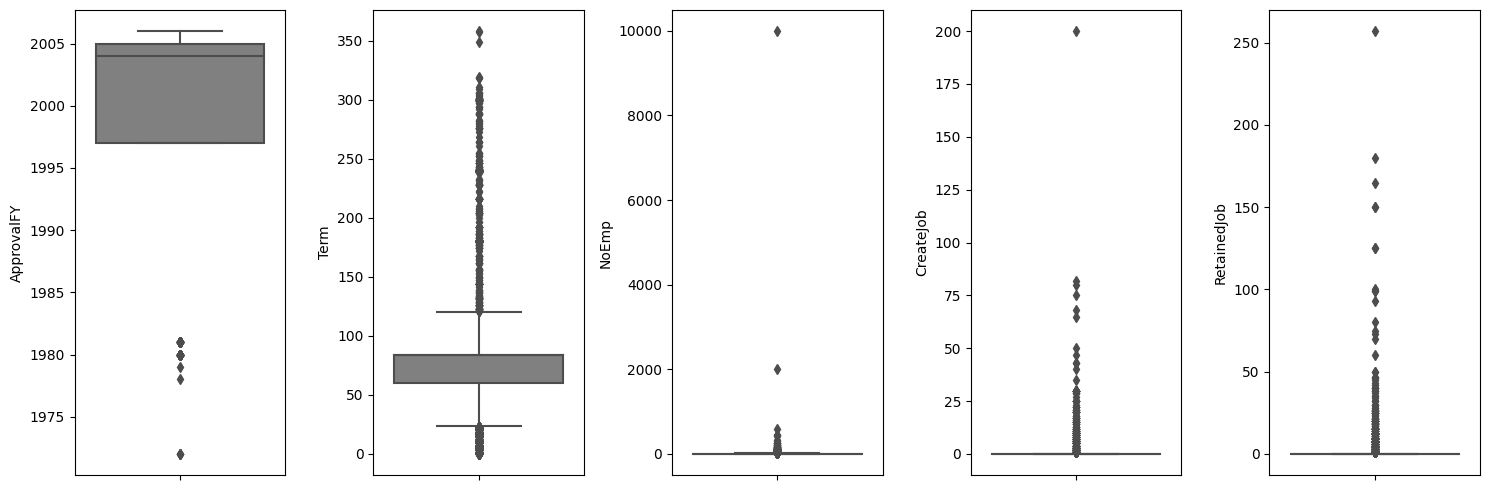

In [ ]:
# Boxplot nums1
plt.figure(figsize=(15,5))
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='gray', orient='v')
    plt.tight_layout()

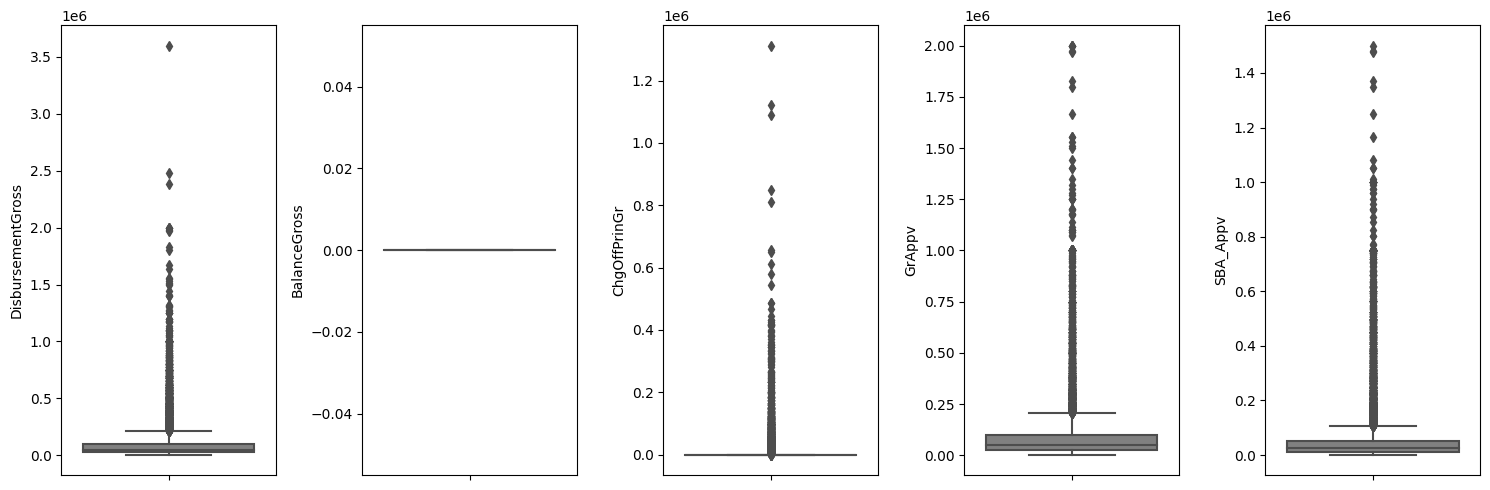

In [ ]:
# Boxplot nums2
plt.figure(figsize=(15,5))
for i in range(0, len(nums2)):
    plt.subplot(1, len(nums2), i+1)
    sns.boxplot(y=df[nums2[i]], color='gray', orient='v')
    plt.tight_layout()

Berdasarkan Boxplot nums1 dan nums2 diketahui bahwa masih terdapat outlier pada beberapa feature, sehingga hal ini dapat diatasi dengan menggunakan metode machine learning yang robust terhadap outlier.

### 1.D Feature transformation

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
#feature transformation
data = df.drop(['Zip', 'Bank', 'FranchiseCode'], axis=1)

In [ ]:
le = LabelEncoder()
data['NewExist'] = le.fit_transform(data['NewExist'])
data['UrbanRural'] = le.fit_transform(data['UrbanRural'])
data['RevLineCr'] = le.fit_transform(data['RevLineCr'])
data['LowDoc'] = le.fit_transform(data['LowDoc'])
data['MIS_Status'] = le.fit_transform(data['MIS_Status'])

In [ ]:
# Scale the numerical variables using StandardScaler
scaler = StandardScaler()
data[['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = scaler.fit_transform(data[['ApprovalFY', 'Term', 'NoEmp', 
      'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']])

In [ ]:
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-1.199884,0.060830,-0.048054,...,0,0,1,1999-02-28,-0.245637,0.0,1,-0.225168,-0.193202,-0.109025
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,0,1,1997-05-31,-0.370580,0.0,1,-0.225168,-0.327603,-0.246394
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-1.199884,1.890291,-0.015642,...,0,0,0,1997-12-31,1.172466,0.0,1,-0.225168,1.332253,1.326916
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,0,1,1997-06-30,-0.401816,0.0,1,-0.225168,-0.361204,-0.280737
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-1.199884,3.033705,0.059987,...,0,0,0,1997-05-14,0.810131,0.0,1,-0.225168,0.942489,1.444968


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12509 entries, 0 to 15566
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LoanNr_ChkDgt      12509 non-null  object        
 1   Name               12509 non-null  object        
 2   City               12509 non-null  object        
 3   State              12509 non-null  object        
 4   BankState          12509 non-null  object        
 5   NAICS              12509 non-null  object        
 6   ApprovalDate       12509 non-null  datetime64[ns]
 7   ApprovalFY         12509 non-null  float64       
 8   Term               12509 non-null  float64       
 9   NoEmp              12509 non-null  float64       
 10  NewExist           12509 non-null  int64         
 11  CreateJob          12509 non-null  float64       
 12  RetainedJob        12509 non-null  float64       
 13  UrbanRural         12509 non-null  int64         
 14  RevLin

### 1.E Feature encoding

In [ ]:
# #Feature encoding
# df = data

# # Define categorical columns
# cat_cols = ['City', 'State', 'BankState', 'NAICS']

# # instantiate encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# # fit and transform the data
# encoded_data = encoder.fit_transform(data[cat_cols])

# # create column names for the encoded data
# feature_names = encoder.get_feature_names(cat_cols)

# # convert encoded data to a DataFrame
# encoded_data_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# # concatenate encoded data with numerical data
# final_data = pd.concat([encoded_data_df, data.drop(cat_cols, axis=1)], axis=1)

# # print the final data
# print(final_data.head())


In [ ]:
mapping_status = {'CHGOFF' : 1, 'PIF' : 0,}
data['MIS_Status'] = data['MIS_Status'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-1.199884,0.060830,-0.048054,...,0,0,1,1999-02-28,-0.245637,0.0,NaN,-0.225168,-0.193202,-0.109025
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,0,1,1997-05-31,-0.370580,0.0,NaN,-0.225168,-0.327603,-0.246394
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-1.199884,1.890291,-0.015642,...,0,0,0,1997-12-31,1.172466,0.0,NaN,-0.225168,1.332253,1.326916
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,0,1,1997-06-30,-0.401816,0.0,NaN,-0.225168,-0.361204,-0.280737
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-1.199884,3.033705,0.059987,...,0,0,0,1997-05-14,0.810131,0.0,NaN,-0.225168,0.942489,1.444968


In [ ]:
mapping_status = {'Yes' : 1, 'No' : 0,}
data['RevLineCr'] = data['RevLineCr'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-1.199884,0.060830,-0.048054,...,0,NaN,1,1999-02-28,-0.245637,0.0,NaN,-0.225168,-0.193202,-0.109025
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,NaN,1,1997-05-31,-0.370580,0.0,NaN,-0.225168,-0.327603,-0.246394
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-1.199884,1.890291,-0.015642,...,0,NaN,0,1997-12-31,1.172466,0.0,NaN,-0.225168,1.332253,1.326916
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,NaN,1,1997-06-30,-0.401816,0.0,NaN,-0.225168,-0.361204,-0.280737
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-1.199884,3.033705,0.059987,...,0,NaN,0,1997-05-14,0.810131,0.0,NaN,-0.225168,0.942489,1.444968


In [ ]:
mapping_status = {'Yes' : 1, 'No' : 0,}
data['LowDoc'] = data['LowDoc'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-1.199884,0.060830,-0.048054,...,0,NaN,NaN,1999-02-28,-0.245637,0.0,NaN,-0.225168,-0.193202,-0.109025
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,NaN,NaN,1997-05-31,-0.370580,0.0,NaN,-0.225168,-0.327603,-0.246394
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-1.199884,1.890291,-0.015642,...,0,NaN,NaN,1997-12-31,1.172466,0.0,NaN,-0.225168,1.332253,1.326916
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,0,NaN,NaN,1997-06-30,-0.401816,0.0,NaN,-0.225168,-0.361204,-0.280737
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-1.199884,3.033705,0.059987,...,0,NaN,NaN,1997-05-14,0.810131,0.0,NaN,-0.225168,0.942489,1.444968


In [ ]:
mapping_status = {'Yes' : 1, 'No' : 0,}
data['UrbanRural'] = data['UrbanRural'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-1.199884,0.060830,-0.048054,...,NaN,NaN,NaN,1999-02-28,-0.245637,0.0,NaN,-0.225168,-0.193202,-0.109025
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,NaN,NaN,NaN,1997-05-31,-0.370580,0.0,NaN,-0.225168,-0.327603,-0.246394
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-1.199884,1.890291,-0.015642,...,NaN,NaN,NaN,1997-12-31,1.172466,0.0,NaN,-0.225168,1.332253,1.326916
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-1.199884,-0.396535,-0.069662,...,NaN,NaN,NaN,1997-06-30,-0.401816,0.0,NaN,-0.225168,-0.361204,-0.280737
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-1.199884,3.033705,0.059987,...,NaN,NaN,NaN,1997-05-14,0.810131,0.0,NaN,-0.225168,0.942489,1.444968


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12509 entries, 0 to 15566
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LoanNr_ChkDgt      12509 non-null  object        
 1   Name               12509 non-null  object        
 2   City               12509 non-null  object        
 3   State              12509 non-null  object        
 4   BankState          12509 non-null  object        
 5   NAICS              12509 non-null  object        
 6   ApprovalDate       12509 non-null  datetime64[ns]
 7   ApprovalFY         12509 non-null  float64       
 8   Term               12509 non-null  float64       
 9   NoEmp              12509 non-null  float64       
 10  NewExist           12509 non-null  int64         
 11  CreateJob          12509 non-null  float64       
 12  RetainedJob        12509 non-null  float64       
 13  UrbanRural         0 non-null      float64       
 14  RevLin

### 1.F Handle class imbalance

In [ ]:
#Handle class imbalance

In [ ]:
minority = data[data['MIS_Status'] == 1]
majority = data[data['MIS_Status'] == 0]

In [ ]:
df = data.dropna(subset=['MIS_Status'])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Define X and y
X = df.drop(['MIS_Status'], axis=1)
y = df['MIS_Status']

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)

ValueError: ignored

## **2. Feature Engineering**

### 2.A Feature Selection

<ipython-input-45-bdce95b02808>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-45-bdce95b02808>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


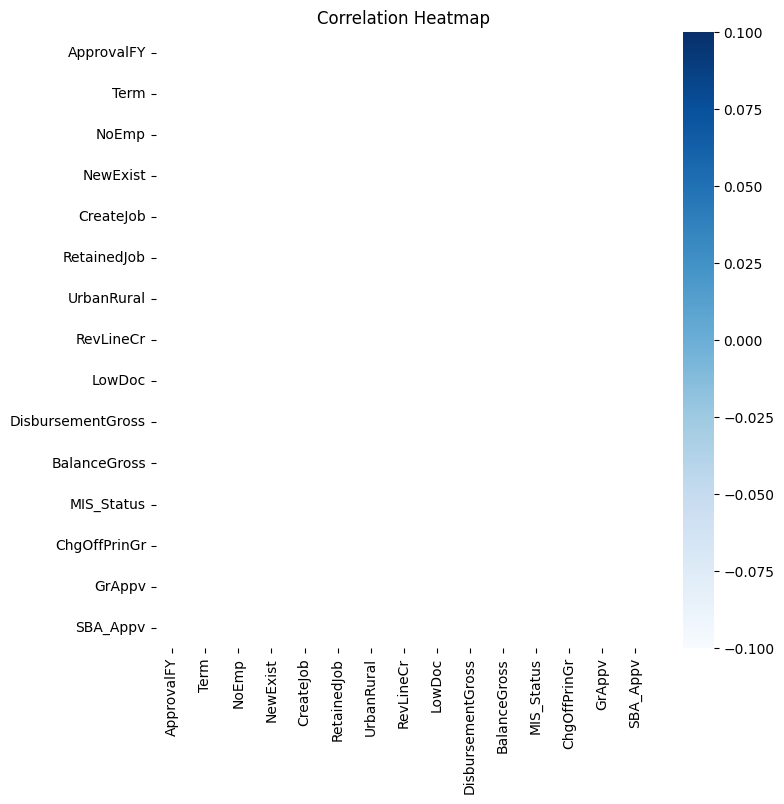

In [ ]:
#Membuat Correlation Heatmap

#Correlation Matrix
corr_matrix = df.corr()

#Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan scatterplot yang telah dilakukan pada stage sebelumnya, terlihat bahwa terdapat beberapa feature yang memiliki korelasi yang kuat sehingga perlu dipilih salah satu feature saja yang bisa dilakukan analisis.
Feature yang memiliki korelasi yang kuat diantaranya adalah :
*  CretaeJob dan RetainedJob
*  DisbursementGross dan GrAppv
*  DisbursementGross dan SBA_Appv
*  GrAppv dan SBA_Appv




### 2.B Feature Extraction

In [ ]:
def segment(x):
    if x['UrbanRural'] <= 0 :
        segment = 'Undefined'
    elif x['UrbanRural'] <= 1	:
        segment = 'urban'
    else :
        segment = 'rural'
    return segment

In [ ]:
df['UrbanRural_new'] = df.apply(lambda x: segment(x), axis = 1)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,UrbanRural_new
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,Undefined
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,Undefined
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,Undefined
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,Undefined
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,Undefined


**Segmentasi Gross Approve menjadi low, mid, high**

In [ ]:
#Mencari nilai minimal Gr Appv
min = df['GrAppv'].min()
print(min)

In [ ]:
#Mencari nilai minimal Gr Appv
max = df['GrAppv'].max()
print(max)

nan


In [ ]:
#Mencari interval/range
range = max-min
print(range)

nan


In [ ]:
#Panjang kelas
range/3

In [ ]:
def gr_class(x):
    if x['GrAppv'] <= 5 :
        gr_class = 'low'
    elif x['GrAppv'] <= 12	:
        gr_class = 'mid'
    else :
        gr_class = 'high'
    return gr_class

In [ ]:
df['GrAppv_Class'] = df.apply(lambda x: gr_class(x), axis = 1)
df.head()

**Segmentasi SBA Approve menjadi low, mid, high**

In [ ]:
#Mencari nilai minimal SBA Appv
min = df['SBA_Appv'].min()
print(min)

In [ ]:
#Mencari nilai maksimal SBA Appv
max = df['SBA_Appv'].max()
print(max)

In [ ]:
#Interval
range = max - min
print(range)

In [ ]:
#Panjang kelas SBA Appv
range/3

In [ ]:
def sba_class(x):
    if x['SBA_Appv'] <= 6.486 :
        sba_class = 'low'
    elif x['SBA_Appv'] <= 13.607	:
        sba_class = 'mid'
    else :
        sba_class = 'high'
    return sba_class

In [ ]:
df['SBAAppv_Class'] = df.apply(lambda x: sba_class(x), axis = 1)
df.head()

**Segmentasi NAICS Industry untuk mengetahui level risiko industrinya**

In [ ]:
#Mengubah tipe data NAICS menjadi string
df['NAICS'] = df['NAICS'].astype(str)

In [ ]:
#Slicing 2 digit pertama dari feature NAICS yang menandakan jenis industri
df['NAICS'] = df['NAICS'].str[:2]
df.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [ ]:
#Mengubah tipe data NAICS kembali menjadi integer
df['NAICS'] = df['NAICS'].astype(int)

In [ ]:
def risk(x):
    if 45 <= x['NAICS'] <= 46 :
        risk = 'high'
    elif 48 <= x['NAICS'] <= 49 :
        risk = 'high'
    elif x['NAICS'] == 56 :
        risk = 'high'
    else :
        risk = 'low'
    return risk

In [ ]:
df['IndustryRisk'] = df.apply(lambda x: risk(x), axis=1)
df.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndustryRisk


### 2.C Feature Tambahan <br>
Feature tambahan yang mungkin akan sangat membantu membuat performansi model semakin bagus diantaranya adalah sebagai berikut :
1. Feature rata-rata penghasilan per bulan usaha kecil. Feature ini berbentuk numerik yang dapat dijadikan pertimbangan bagi SBA dalam menentukan jaminan. 
2. Feature rata-rata pengeluaran per bulan usaha kecil. Feature ini berbentuk numerik yang dapat dijadikan pertimbangan bagi SBA dalam menentukan jaminan.
3. Feature jenis industri, untuk dilihat dari segi risiko, karena semua industri memiliki risiko masing-masing. Seperti contohnya pada perusahaan pertanian yang memiliki risiko gagal panen, maka dapat diragukan kemampuan membayar pinjamannya. Informasi datanya bisa didaptkan saat peminjaman melampirkan infromasi perusahaannya. Dan untuk menggunakan feature ini, maka SBA harus lebih memerhatikan kondisi yang bisa berhubungan dengan industri peminjam.
4. Feature jumlah aset, untuk menilai kelayakan peminjaman uang dan kemampuan membayar kembali pinjaman. Mengetahui jumlah aset dari sebuah perusahaan dapat membantu dalam menilai kelayakan mereka untuk meminjam uang dan membayar kembali pinjaman tersebut.
5. Feature riwayat pembayaran tagihan, tagihan bulanan seperti tagihan listrik apakah dibayarkan tepat pada waktunya. Riwayat ini dapat mencerminkan stabilitas bisnis dan potensi penghasilan perusahaan di masa depan, yang bisa digunakan untuk memproyeksi apakah peminjam mampu membayar pinjamannya. Untuk mendapatkan data ini, maka peminjam harus melampirkan rekap pembayaran transaksi yang nantinya bisa diubah ke data atau segmentasi data yang diperlukan.

# **Terima Kasih**